In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mnist.csv', header = None)
label = data.iloc[:,[0]].copy().values
X = data.drop(columns = 0).copy().values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Question 1

In [4]:
# mean vector 

mean_vector = np.mean(X, axis = 0)
mean_vector.shape


# centering data

X_centred = (X - mean_vector).T
X_centred.shape

cov = (X_centred @ X_centred.T)
cov.shape

eigvals, eigvecs = np.linalg.eig(cov)

# sort eigenvectors and values

idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

P = np.real(eigvecs[:,:10])
P.shape

transformed_X = P.T@X_centred

new_cov = transformed_X@transformed_X.T
new_cov



(784,)

# Question 2


In [25]:
class Cluster:
    def __init__(self, name, centre):
        self.name = name
        self.centre = centre
        self.members = []

    def set_centre(self, centre):
        self.centre = centre
    
    def add_member(self, datapoint):
        self.members.append(datapoint)
        
    def calculate_new_centre(self):
        members = np.array(self.members)
        sum_members = np.sum(members, axis = 0)
        new_mean = sum_members/len(members)
        self.centre = new_mean
        
    def reset(self):
        self.members = []
    
    def __repr__(self):
        return str(self.centre)

In [29]:
# initialise cluster centres

np.random.seed(69)
k = 10
N = len(X)
initial_centres = np.random.randint(low = 0, high = N, size = k)

clusters = {}
for each_k in range(k):
    clusters[each_k] = Cluster(each_k, X[initial_centres[each_k]])

# initialise r

#np.random.seed(69) 
r = np.zeros((N, k))
for i in range(N):
    initial_assignment = np.random.randint(low = 0, high = k)
    r[i, initial_assignment] = 1

In [30]:
max_iter = 100
loss_ls = []

for niter in range(max_iter):
    r_new = []
    loss = 0
    
    for i in range(N):
        distance_ls = []
        
        for each_cluster in clusters:
             
            # calculate distance between X_i and cluster centre k
            d_ik = np.linalg.norm(X[i]-clusters[each_cluster].centre)**2
            distance_ls.append(d_ik)
            
        #print(distance_ls)
        new_label = distance_ls.index(np.min(distance_ls))
        clusters[new_label].add_member(X[i])
        
        distance_ls = np.array(distance_ls)
        new_assignment_for_i = (distance_ls == np.min(distance_ls))
        r_new.append(new_assignment_for_i)
        
        loss_i = distance_ls[new_label]
        loss += loss_i
    
    print(niter, np.allclose(r, r_new))
    if np.allclose(r, r_new):
        print('done')
        break
        
    r = r_new
    loss_ls.append(loss)
        
    for each_cluster in clusters:
        clusters[each_cluster].calculate_new_centre()
        clusters[each_cluster].reset()

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 True
done


# Question 3

Text(0.5, 1.0, 'Change of loss value w.r.t to the number of iterations')

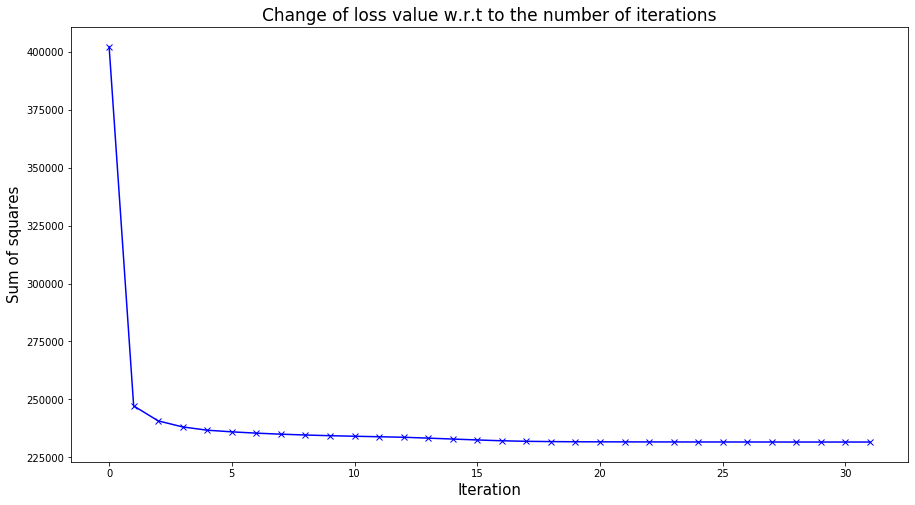

In [31]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(loss_ls, color = 'blue', marker = 'x')
plt.ylabel('Sum of squares', fontsize = 15)
plt.xlabel('Iteration', fontsize = 15)
plt.title('Change of loss value w.r.t to the number of iterations', fontsize = 17)